In [17]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Inisialisasi SparkSession
spark = SparkSession.builder.appName("dbbahanpokok_analysis").getOrCreate()

# Load dataset
file_path = "dbbahanpokok.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [18]:
# Menampilkan skema dataset
df.printSchema()

root
 |-- Tahun: integer (nullable = true)
 |-- Bulan: integer (nullable = true)
 |-- Tanggal: integer (nullable = true)
 |-- Cabai Merah Keriting: integer (nullable = true)
 |-- Cabai Rawit Merah: integer (nullable = true)



In [19]:
# Menampilkan beberapa baris pertama dataset
df.show(5)

+-----+-----+-------+--------------------+-----------------+
|Tahun|Bulan|Tanggal|Cabai Merah Keriting|Cabai Rawit Merah|
+-----+-----+-------+--------------------+-----------------+
| 2022|    5|      1|               46970|            45120|
| 2022|    5|      2|               46150|            47190|
| 2022|    5|      3|               47720|            47210|
| 2022|    5|      4|               47090|            46750|
| 2022|    5|      5|               46210|            46550|
+-----+-----+-------+--------------------+-----------------+
only showing top 5 rows



In [20]:
# Eksplorasi Data (Contoh: Menghitung jumlah baris dan kolom)
num_rows = df.count()
num_cols = len(df.columns)

print(f"Jumlah baris: {num_rows}")
print(f"Jumlah kolom: {num_cols}")

Jumlah baris: 571
Jumlah kolom: 5


In [21]:
# Statistik Deskriptif
desc_stats = df.describe().toPandas()
print(desc_stats)

  summary                Tahun              Bulan             Tanggal  \
0   count                  571                571                 571   
1    mean    2022.630472854641  6.387040280210158  16.632224168126093   
2  stddev  0.48309995393268096  3.490202853923042   8.494659527196713   
3     min                 2022                  1                   1   
4     max                 2023                 12                  31   

  Cabai Merah Keriting   Cabai Rawit Merah  
0                  571                 571  
1    46777.84588441331   54619.31698774081  
2   14247.481270197475  16355.535027136957  
3                30350               32350  
4                90350               97990  


In [22]:
# Eksplorasi Data Lebih Lanjut (Contoh: Menampilkan nilai unik pada kolom 'Komoditas (Rp)')
unique_values = df.select("Tahun").distinct().show()

+-----+
|Tahun|
+-----+
| 2023|
| 2022|
+-----+



In [23]:
# Menampilkan ringkasan statistik untuk kolom tertentu
summary_stats = df.select("Cabai Merah Keriting", "Cabai Rawit Merah").summary("mean", "min", "max")
summary_stats.show()

+-------+--------------------+-----------------+
|summary|Cabai Merah Keriting|Cabai Rawit Merah|
+-------+--------------------+-----------------+
|   mean|   46777.84588441331|54619.31698774081|
|    min|               30350|            32350|
|    max|               90350|            97990|
+-------+--------------------+-----------------+



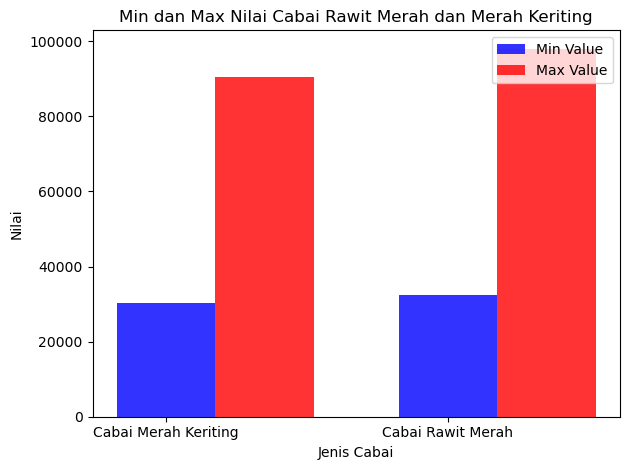

In [24]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, min, max
from pyspark.sql.types import FloatType

# Inisialisasi SparkSession
spark = SparkSession.builder.appName("dbbahanpokok_analysis").getOrCreate()

# Ganti 'path/to/your/dataset.csv' dengan lokasi dataset sebenarnya
dataset_path = 'dbbahanpokok.csv'
df = spark.read.csv(dataset_path, header=True, inferSchema=True)

# Ambil data yang diperlukan
df_cabai = df.select("Tahun", "Bulan", "Cabai Merah Keriting", "Cabai Rawit Merah")

# Ambil nilai min dan max untuk "Beras Premium" dan "Beras Medium"
min_max_values = df_cabai.agg(
    min("Cabai Merah Keriting").cast(FloatType()).alias("min_Merah_Keriting"),
    max("Cabai Merah Keriting").cast(FloatType()).alias("max_Merah_Keriting"),
    min("Cabai Rawit Merah").cast(FloatType()).alias("min_Rawit_Merah"),
    max("Cabai Rawit Merah").cast(FloatType()).alias("max_Rawit_Merah")
).collect()[0]

min_merah_keriting = min_max_values["min_Merah_Keriting"]
max_merah_keriting = min_max_values["max_Merah_Keriting"]
min_rawit_merah = min_max_values["min_Rawit_Merah"]
max_rawit_merah = min_max_values["max_Rawit_Merah"]

# Visualisasi dengan Matplotlib
labels = ["Cabai Merah Keriting", "Cabai Rawit Merah"]
min_values = [min_merah_keriting, min_rawit_merah]
max_values = [max_merah_keriting, max_rawit_merah]

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(labels, min_values, bar_width, alpha=opacity, color='b', label='Min Value')
rects2 = plt.bar([x + bar_width for x in range(len(labels))], max_values, bar_width, alpha=opacity, color='r', label='Max Value')

plt.xlabel('Jenis Cabai')
plt.ylabel('Nilai')
plt.title('Min dan Max Nilai Cabai Rawit Merah dan Merah Keriting')
plt.legend()

plt.tight_layout()
plt.show()

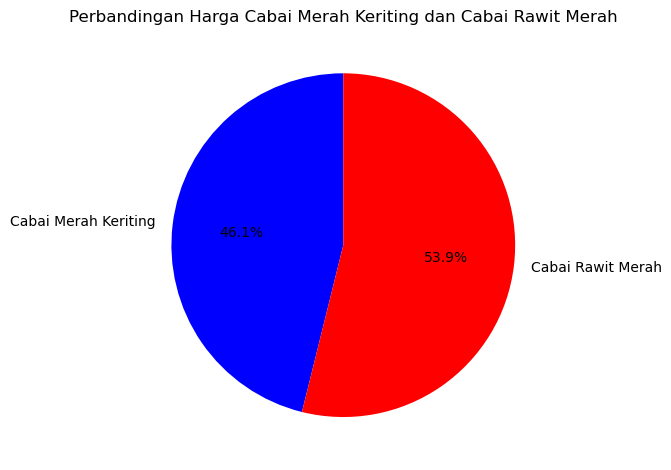

In [25]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

# Inisialisasi SparkSession
spark = SparkSession.builder.appName("dbbahanpokok_analysis").getOrCreate()

# Ganti 'path/to/your/dataset.csv' dengan lokasi dataset sebenarnya
dataset_path = 'dbbahanpokok.csv'
df = spark.read.csv(dataset_path, header=True, inferSchema=True)

# Ambil data yang diperlukan
df_cabai = df.select("Cabai Merah Keriting", "Cabai Rawit Merah")

# Ambil nilai rata-rata untuk "Cabai Merah Keriting" dan "Cabai Rawit Merah"
avg_values = df_cabai.groupBy().agg(
    avg("Cabai Merah Keriting").alias("avg_Cabai_Merah_Kriting"),
    avg("Cabai Rawit Merah").alias("avg_Cabai_Rawit_Merah")
).collect()[0]

avg_cabai_merah_kriting = avg_values["avg_Cabai_Merah_Kriting"]
avg_cabai_rawit_merah = avg_values["avg_Cabai_Rawit_Merah"]

# Visualisasi dengan Matplotlib (diagram pie)
labels = ["Cabai Merah Keriting", "Cabai Rawit Merah"]
values = [avg_cabai_merah_kriting, avg_cabai_rawit_merah]

fig, ax = plt.subplots()

# Atur proporsi bagian diagram pie
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])

plt.title('')

plt.tight_layout()
plt.show()


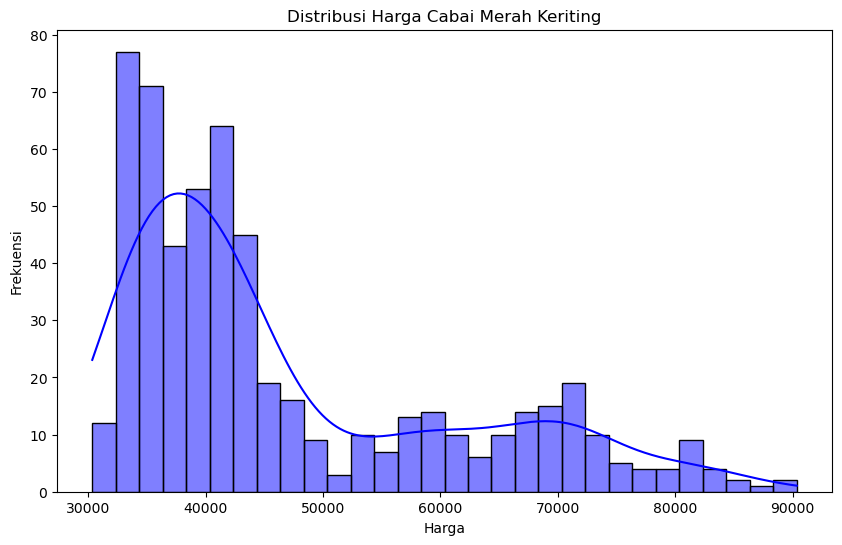

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ganti 'Cabai Merah Keriting' dengan bahan pokok yang ingin Anda analisis
selected_commodity = 'Cabai Merah Keriting'
commodity_data = df.select(selected_commodity).dropna().toPandas()[selected_commodity]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(commodity_data, bins=30, kde=True, color='blue')
plt.title(f'Distribusi Harga {selected_commodity}')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()


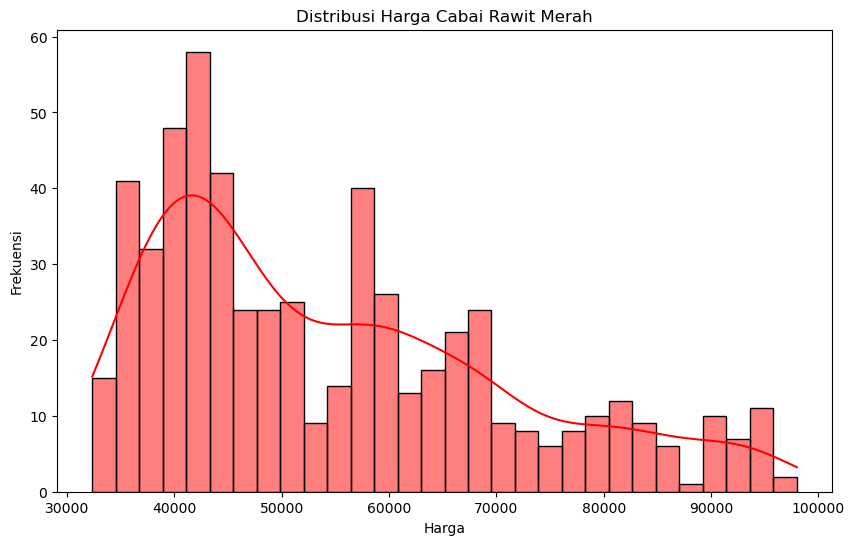

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ganti 'Cabai Merah Keriting' dengan bahan pokok yang ingin Anda analisis
selected_commodity = 'Cabai Rawit Merah'
commodity_data = df.select(selected_commodity).dropna().toPandas()[selected_commodity]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(commodity_data, bins=30, kde=True, color='red')
plt.title(f'Distribusi Harga {selected_commodity}')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()


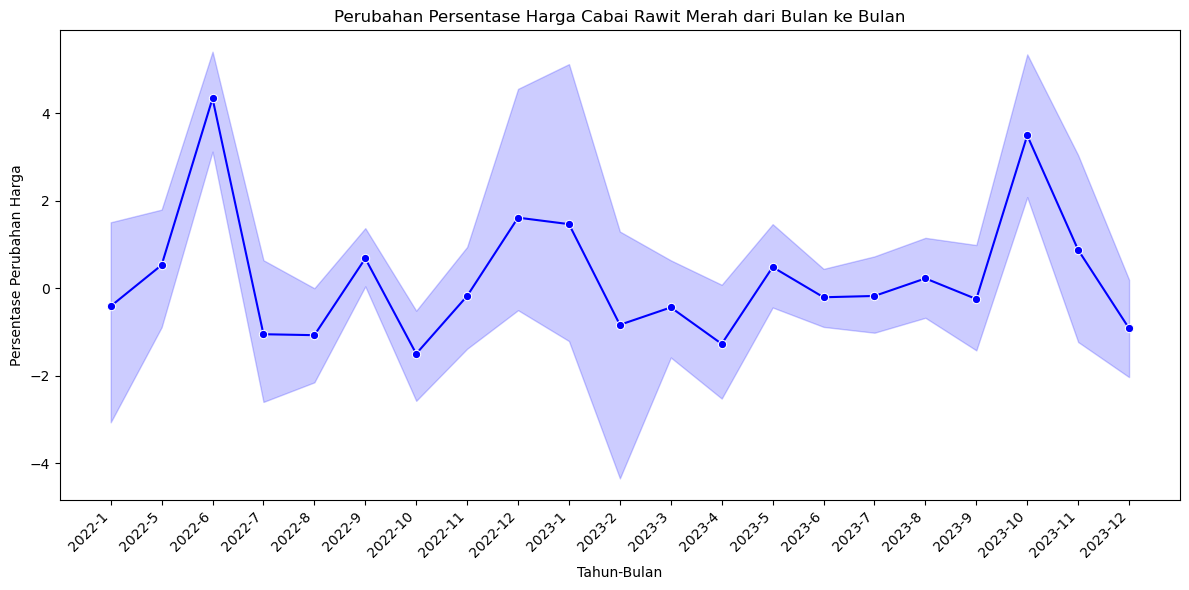

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.window import Window
from pyspark.sql import functions as F

# Ganti 'Cabai Merah Keriting' dengan bahan pokok yang ingin Anda analisis
selected_commodity = 'Cabai Rawit Merah'

# Ambil data yang diperlukan
commodity_data = df.select("Tahun", "Bulan", selected_commodity).dropna()

# Hitung persentase perubahan harga dari bulan ke bulan
window_spec = Window().orderBy("Tahun", "Bulan")
percentage_change_column = f"{selected_commodity}_Percentage_Change"
commodity_data = commodity_data.withColumn(
    percentage_change_column,
    F.round((F.col(selected_commodity) - F.lag(selected_commodity).over(window_spec)) / F.lag(selected_commodity).over(window_spec) * 100, 2)
)

# Hapus baris dengan nilai persentase perubahan NULL (biasanya pada bulan pertama setiap tahun)
commodity_data = commodity_data.filter(~F.isnull(percentage_change_column))

# Gabungkan kolom Tahun dan Bulan menjadi satu kolom untuk sumbu x
commodity_data = commodity_data.withColumn("Tahun-Bulan", F.concat_ws("-", "Tahun", "Bulan"))

# Visualisasi dengan Matplotlib (line chart)
plt.figure(figsize=(12, 6))
sns.lineplot(data=commodity_data.toPandas(), x="Tahun-Bulan", y=percentage_change_column, marker="o", color='b')
plt.title(f'Perubahan Persentase Harga {selected_commodity} dari Bulan ke Bulan')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Persentase Perubahan Harga')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


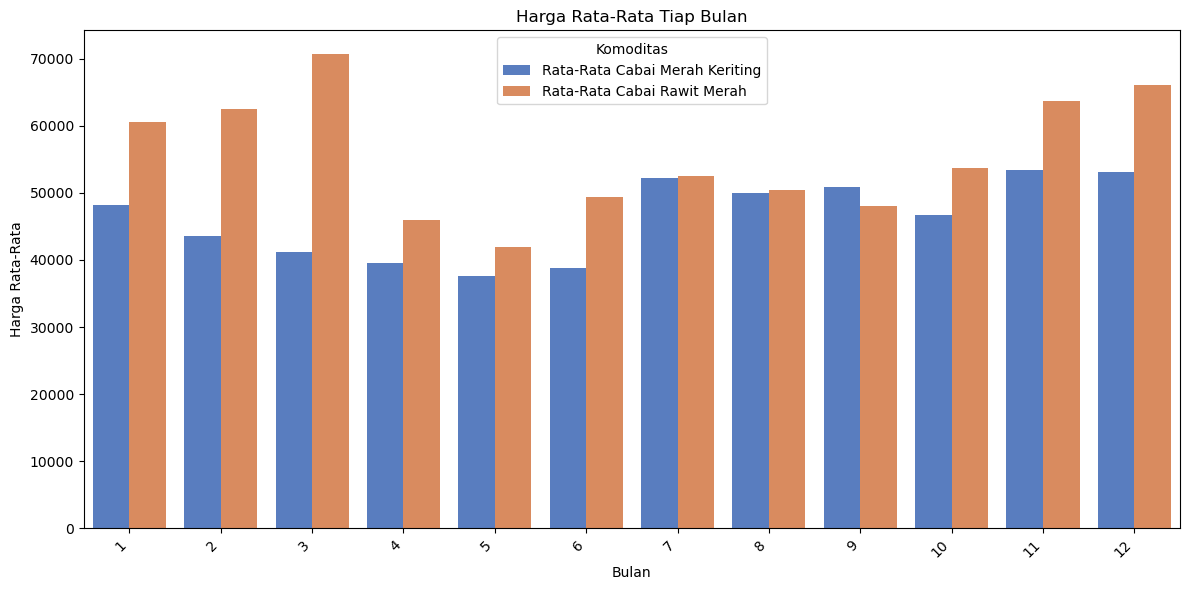

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# Ambil data yang diperlukan
kolom_komoditas = ["Bulan", "Cabai Merah Keriting", "Cabai Rawit Merah"]
average_price_data = df.select(kolom_komoditas).groupBy("Bulan").agg(
    F.round(F.avg("Cabai Merah Keriting"), 2).alias("Rata-Rata Cabai Merah Keriting"),
    F.round(F.avg("Cabai Rawit Merah"), 2).alias("Rata-Rata Cabai Rawit Merah"),
).orderBy("Bulan")

# Ubah data menjadi format yang sesuai untuk visualisasi
average_price_data_pd = average_price_data.toPandas().melt(id_vars=["Bulan"])

# Visualisasi dengan Matplotlib (bar chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_data_pd, x="Bulan", y="value", hue="variable", palette="muted")
plt.title('Harga Rata-Rata Tiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Harga Rata-Rata')
plt.legend(title="Komoditas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [33]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# Tentukan fitur yang akan digunakan untuk prediksi
feature_columns_with_tahun = ['Tahun', 'Bulan', 'Tanggal', 'Cabai Merah Keriting', 'Cabai Rawit Merah']

# Gabungkan fitur menjadi vektor menggunakan VectorAssembler
vector_assembler = VectorAssembler(inputCols=feature_columns_with_tahun, outputCol="features")

# Membagi data menjadi set pelatihan dan pengujian
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Membuat model regresi linear
lr = LinearRegression(featuresCol='features', labelCol='Cabai Merah Keriting')

# Membuat pipeline
pipeline = Pipeline(stages=[vector_assembler, lr])

# Melatih model
model = pipeline.fit(train_data)

# Menguji model
predictions = model.transform(test_data)

# Menampilkan hasil prediksi
predictions.select('Tahun', 'Bulan', 'Tanggal', 'Cabai Merah Keriting', 'Cabai Rawit Merah', 'prediction').show()

# Evaluasi model
evaluator = RegressionEvaluator(labelCol='Cabai Merah Keriting', predictionCol='prediction', metricName='mse')
mse = evaluator.evaluate(predictions)

print(f"Mean Squared Error (MSE) on test data: {mse}")


+-----+-----+-------+--------------------+-----------------+------------------+
|Tahun|Bulan|Tanggal|Cabai Merah Keriting|Cabai Rawit Merah|        prediction|
+-----+-----+-------+--------------------+-----------------+------------------+
| 2022|    1|      3|               53860|            60120|           53860.0|
| 2022|    1|      7|               53320|            58540| 53320.00000000001|
| 2022|    1|      9|               54240|            57720| 54240.00000000001|
| 2022|    1|     15|               41450|            43040| 41450.00000000001|
| 2022|    1|     22|               33750|            41010|33749.999999999985|
| 2022|    1|     26|               36100|            46710|36099.999999999985|
| 2022|    5|      3|               47720|            47210|           47720.0|
| 2022|    5|      9|               38720|            41000| 38719.99999999999|
| 2022|    5|     19|               38440|            43650| 38439.99999999999|
| 2022|    5|     20|               3836